<a href="https://colab.research.google.com/github/up99/golf-sintez/blob/main/Media_Pipe_Mistakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Install and Import Dependencies

In [2]:
!pip install mediapipe opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 40.2 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

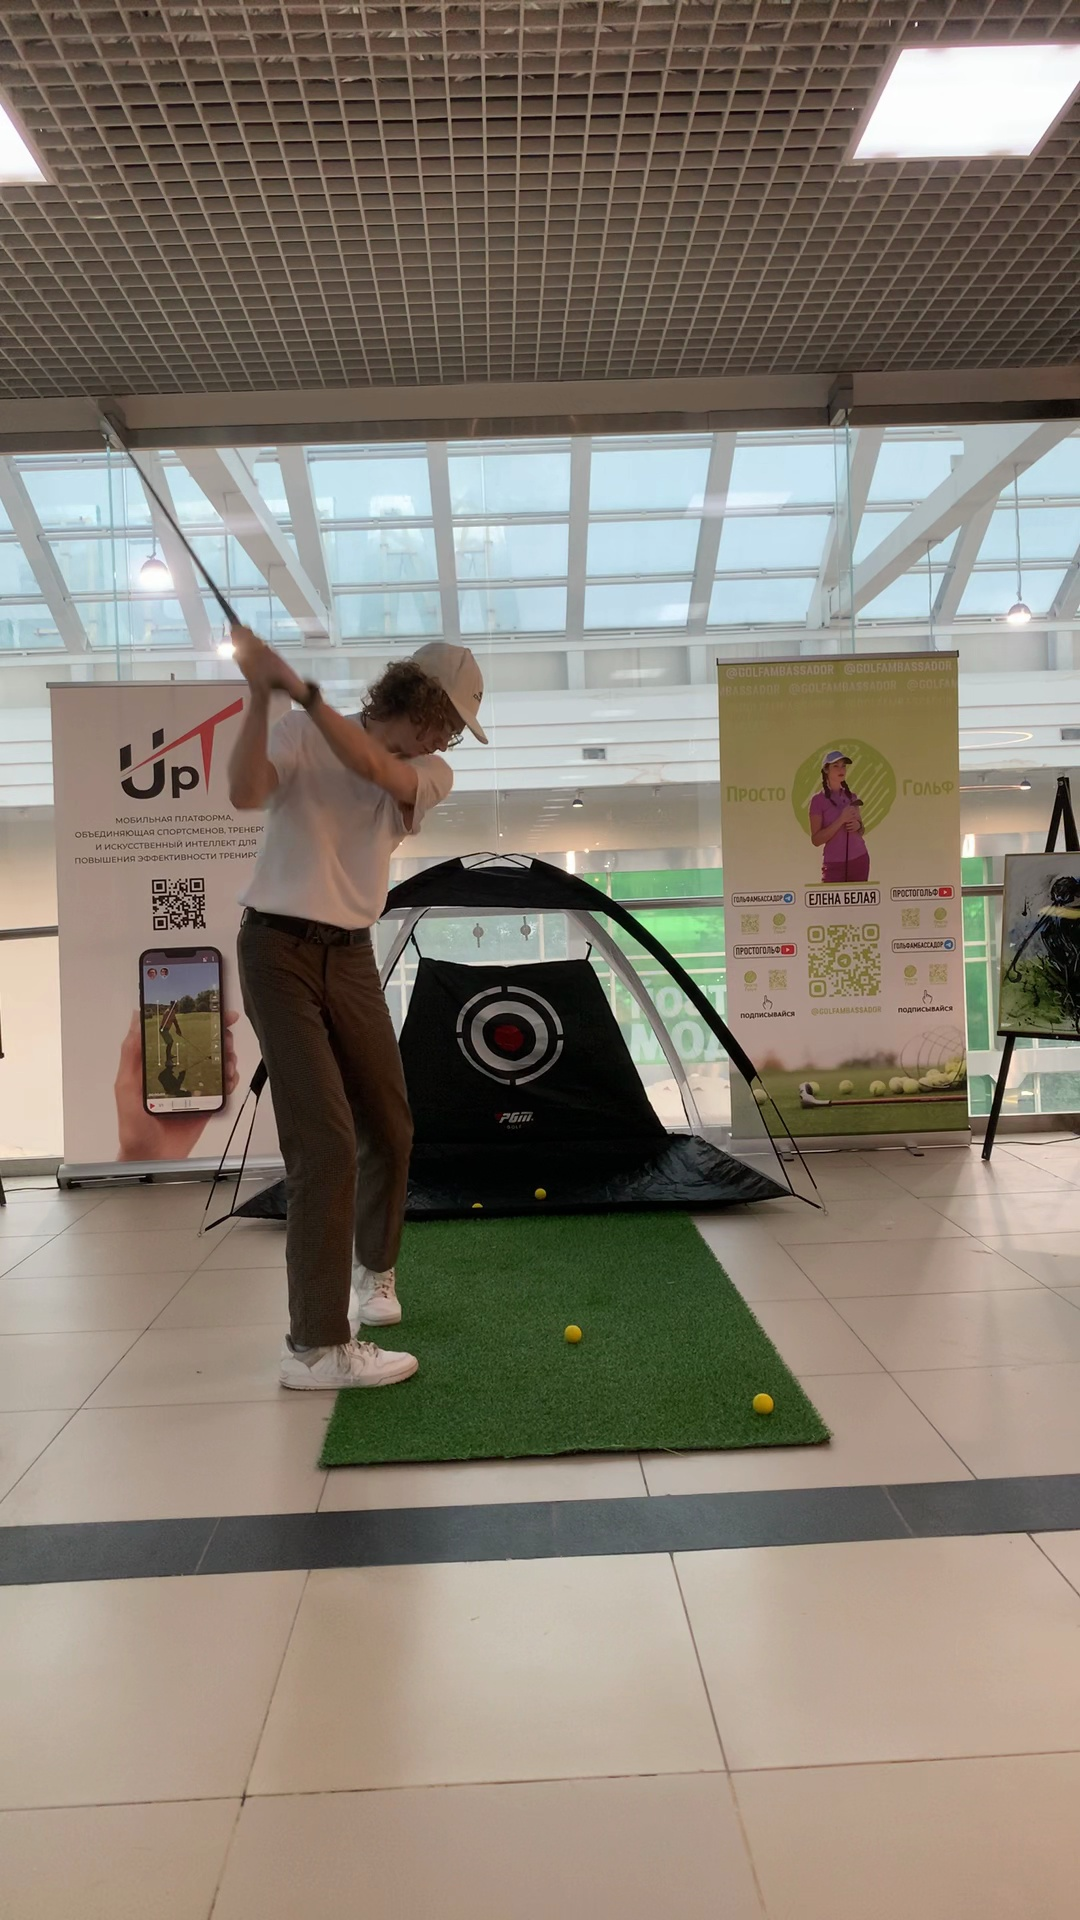

In [5]:
frame = cv2.imread("/content/drive/MyDrive/цифровой_прорыв/0ae17d29-242b-40ec-bff6-fe6b23ac8824_frame_19.jpg")
cv2_imshow(frame)
cv2.destroyAllWindows()

<img src="https://i.imgur.com/3j8BPdc.png" style="height:300px" >

# 3. Calculate Angles

In [37]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)

    if angle >180.0:
        angle = 360-angle

    return angle

shoulders,
 elbows, wrists, hips, knees, ankles, heels, foot indexes, ears and mouth

address :
180deg - hip-knee-ankle  = (20,25) deg
180deg - knee-hip-shoullder = 45 deg

mistake

Lead side lateral bending

head movement : for P1 Address P4 Top  eye_outer, ear, mouth should be the same

In [55]:
def address_mistake(eps,shoulder, hip, knee, ankle):
  alpha = 180 - calculate_angle(hip, knee, ankle)
  beta = 180 - calculate_angle(knee, hip, shoulder)

  if alpha< (20 - eps) or alpha>(25 + eps):
    print("addess is incorrect with knee, alpha is ", alpha, "\n")
  if beta <(45 - eps) or beta> (45 + eps):
    print("address incorrect spine angle, beta is ", beta, "\n")



In [56]:
def head_mov_mistake(ear_P1,  mouth_P1, ear_P4, mouth_P4, eps):
  if (ear_P1 not in (ear_P4- eps, ear_P4 + eps)) or (mouth_P1 not in (mouth_P4- eps, mouth_P4 + eps)):
     print("head movement mistake\n")


In [58]:

## Setup mediapipe instance
ear_P1,  mouth_P1, ear_P4, mouth_P4 = [0,0], [0,0], [0,0], [0,0]
stage = "address"
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:


      frame = cv2.imread("/content/drive/MyDrive/цифровой_прорыв/0ae17d29-242b-40ec-bff6-fe6b23ac8824_frame_19.jpg")

      # Recolor image to RGB
      image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      image.flags.writeable = False

      # Make detection
      results = pose.process(image)

      # Recolor back to BGR
      image.flags.writeable = True
      image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

      # Extract landmarks
      try:

          landmarks = results.pose_landmarks.landmark
          if stage =="address":
            if (landmarks[mp_pose.PoseLandmark.LEFT_EAR.value] and landmarks[mp_pose.PoseLandmark.LEFT_MOUTH.value]):
              ear_P1 =  [landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].y]
              mouth_P1 = [landmarks[mp_pose.PoseLandmark.LEFT_MOUTH.value].x,landmarks[mp_pose.PoseLandmark.LEFT_MOUTH.value].y]
            if (landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value] and landmarks[mp_pose.PoseLandmark.RIGHT_MOUTH.value]):
              ear_P1 =  [landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].y]
              mouth_P1 = [landmarks[mp_pose.PoseLandmark.RIGHT_MOUTH.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_MOUTH.value].y]
            eps = 10
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            knee =  [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            ankle =  [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            address_mistake(eps ,shoulder, hip, knee, ankle)
          if stage =="top":
            if (landmarks[mp_pose.PoseLandmark.LEFT_EAR.value] and landmarks[mp_pose.PoseLandmark.LEFT_MOUTH.value]):
              ear_P4 =  [landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].y]
              mouth_P4 = [landmarks[mp_pose.PoseLandmark.LEFT_MOUTH.value].x,landmarks[mp_pose.PoseLandmark.LEFT_MOUTH.value].y]
            if (landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value] and landmarks[mp_pose.PoseLandmark.RIGHT_MOUTH.value]):
              ear_P4 =  [landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].y]
              mouth_P4 = [landmarks[mp_pose.PoseLandmark.RIGHT_MOUTH.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_MOUTH.value].y]

          # Get coordinates
          # shoulder_l = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
          # elbow_l = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
          # wrist_l = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
          # hip_l = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
          # knee_l =  [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
          # ankle_l =  [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
          # heel_l =  [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y]
          # foot_ind_l =  [landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].y]
          # ear_l =  [landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].y]
          # mouth_l =  [landmarks[mp_pose.PoseLandmark.LEFT_MOUTH.value].x,landmarks[mp_pose.PoseLandmark.LEFT_MOUTH.value].y]





          # # Calculate angle
          # angle = calculate_angle(shoulder, elbow, wrist)

          # # Visualize angle
          # cv2.putText(image, str(angle),
          #                 tuple(np.multiply(elbow, [640, 480]).astype(int)),
          #                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
          #                     )
          # print(angle)

      except:
          pass


      # # Render detections
      # mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
      #                         mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
      #                         mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
      #                           )
      # cv2_imshow(image)
      # cv2.destroyAllWindows()


address incorrect spine angle, beta is  57.184449247869736 



In [13]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [16]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

x: 0.24656304717063904
y: 0.3467384874820709
z: -0.03392228111624718
visibility: 0.8929044008255005